In [8]:
%matplotlib inline
import random 
import torch
import matplotlib.pyplot as plt


features: tensor([-0.5145, -1.1731]) 
labels: tensor([7.2825])


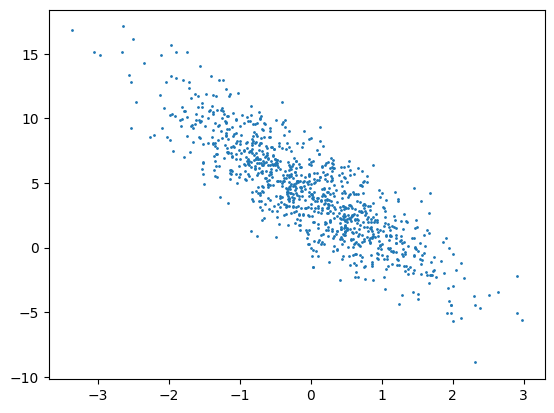

In [10]:
def synthetic_data(w, b, num_examples):
    """合成y = Wx + b + 噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.1, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0], '\nlabels:', labels[0])

plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)
plt.show()

In [11]:
#读取数据集
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 样本都是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = indices[i:min(i + batch_size, num_examples)]
    yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.8082,  0.8317],
        [ 2.2672,  1.5465],
        [-0.4954, -0.1905],
        [ 1.1580, -0.2835],
        [ 2.3875, -1.9688],
        [ 2.5563,  1.4535],
        [ 0.7636, -1.3752],
        [-0.9849, -0.6885],
        [ 0.5467, -0.1464],
        [ 1.7749,  0.6088]]) 
 tensor([[ 2.8996],
        [ 3.5975],
        [ 4.0412],
        [ 7.4619],
        [15.7157],
        [ 4.6242],
        [10.3065],
        [ 4.3492],
        [ 5.6540],
        [ 5.7038]])


In [18]:
# 初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 定义模型
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

# 定义损失函数
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

# 定义优化算法
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

lr = 0.03
num_epochs = 1000
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

print(f'w的估计误差： {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差： {true_b - b}')

epoch 1, loss 15.683057
epoch 2, loss 15.233313
epoch 3, loss 14.559435
epoch 4, loss 13.051660
epoch 5, loss 12.566791
epoch 6, loss 11.874925
epoch 7, loss 11.407253
epoch 8, loss 10.596663
epoch 9, loss 9.895014
epoch 10, loss 9.071654
epoch 11, loss 8.770299
epoch 12, loss 8.087708
epoch 13, loss 7.557449
epoch 14, loss 6.856444
epoch 15, loss 6.563329
epoch 16, loss 6.336084
epoch 17, loss 5.891818
epoch 18, loss 5.728229
epoch 19, loss 5.271100
epoch 20, loss 4.933720
epoch 21, loss 4.738472
epoch 22, loss 4.428716
epoch 23, loss 4.155923
epoch 24, loss 3.926690
epoch 25, loss 3.724631
epoch 26, loss 3.523246
epoch 27, loss 3.219400
epoch 28, loss 3.060019
epoch 29, loss 2.929364
epoch 30, loss 2.664561
epoch 31, loss 2.560695
epoch 32, loss 2.337783
epoch 33, loss 2.172549
epoch 34, loss 2.099626
epoch 35, loss 1.912679
epoch 36, loss 1.781673
epoch 37, loss 1.725931
epoch 38, loss 1.644892
epoch 39, loss 1.546038
epoch 40, loss 1.440693
epoch 41, loss 1.364833
epoch 42, loss 1.